In [4]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import scipy.stats as st
import similaritymeasures as sm

import pdb
import sys
sys.path.append('../')
import fig_format

In [2]:
data_str = 'v2'
data_path = f'data/patterns_{data_str}.json'

with open(data_path, 'r') as f:
    data = json.load(f)

In [3]:
data_c1 = data[11:]
data_c2 = data[:10]

In [43]:

# pd.DataFrame(data_c1[0]['data'])
data_c1[0]['config']

{'id': '6036561c',
 'is_prolific': True,
 'is_sona': False,
 'institution': 'yale',
 'description': 'intentional-patterns v2_bonus',
 'datetime': '2022-10-20T15:38:47.462Z',
 'already_visited': False,
 'width': 1800,
 'height': 1200,
 'renderer': 'webgl',
 'user_agent': {'browser': {'name': 'Chrome',
   'version': '106.0.0.0',
   'major': '106'},
  'os': {'name': 'Windows', 'version': '10'}},
 'fullscreen_supported': True,
 'is_debug': False,
 'version': 1,
 'condition': '1'}

In [20]:
td = pd.DataFrame(data_c1[0]['data']).query('set == "main" & score > 0')['pointer_data']
arr = np.stack([td.iloc[0]['x'], td.iloc[0]['y']]).T
arr.shape
for i in td:
    print(i)
    break

{'time': [326.5, 333.5, 340.3, 347.1, 354.2, 361, 367.9, 375, 381.8, 388.8, 395.7, 402.6, 409.5, 416.5, 423.5, 430.4, 437.3, 444.4, 451.3, 458.2, 465.2, 472.1, 479.2, 486.2, 493.2, 500, 506.8, 513.8, 520.7, 527.7, 534.5, 541.5, 548.5, 555.5, 562.5, 569.4, 576.4, 583.4, 590.1, 597.1, 604.1, 611.1, 618.1, 624.8, 631.7, 638.7, 645.7, 652.8, 659.6, 666.5, 673.6, 680.6, 687.5, 694.3, 701.4, 708.2, 715.3, 722.3, 729.1, 736.1, 743, 749.9, 756.8, 763.8, 771, 777.9, 784.7, 791.8, 798.6, 805.6, 812.6, 819.5, 826.3, 833.4, 840.4, 847.2, 854.3, 861.1, 868, 875.1, 882, 889, 895.8, 902.8, 909.7, 916.5, 923.6, 930.5, 937.4, 944.5, 951.3, 958.4, 965.4, 972.1, 979.1, 986, 992.9, 999.8, 1007, 1013.9, 1020.8, 1027.8], 'x': [4.656, 7.982, 12.971, 17.96, 24.612, 32.927, 41.242, 52.882, 64.523, 77.827, 92.794, 109.423, 127.716, 149.335, 169.29, 189.246, 215.854, 234.146, 257.428, 277.384, 294.013, 308.98, 323.947, 337.251, 350.554, 363.858, 377.162, 388.803, 400.443, 410.421, 422.062, 430.377, 438.692, 445.

In [117]:
# participant = data[6]
# pdata_stats_c1 = {1:[], 2:[], 3:[], 4:[]}
pdata_stats_c1_p3 = {1:[], 2:[], 3:[], 4:[]}
for participant in data_c1:
    td = pd.DataFrame(participant['data'])
    td = td.query('set == "main"')

    for i in range(1,5):
#         pattern = td.query('step == @i').pattern.iloc[0]
        tdi = td.query('step == @i & score > 0 & phase == 3')
        
        pointer_data = tdi['pointer_data']
        pdata_arrs = []
        dists = []
        for pdata in pointer_data:
            pdata_arrs.append(np.stack([pdata['x'], pdata['y']]).T)
        for j in range(15):
            a, b = np.random.choice(len(pdata_arrs), 2, False)
            dists.append(sm.frechet_dist(pdata_arrs[a], pdata_arrs[b]))
                
        dists = np.asarray(dists)
        pdata_stats_c1_p3[i].append(dists)
        
    print('finished participant')
        

finished participant
finished participant
finished participant
finished participant
finished participant
finished participant
finished participant
finished participant
finished participant
finished participant


In [118]:
# participant = data[6]
# pdata_stats_c2 = {1:[], 2:[], 3:[], 4:[]}
pdata_stats_c2_p3 = {1:[], 2:[], 3:[], 4:[]}
for participant in data_c2:
    td = pd.DataFrame(participant['data'])
    td = td.query('set == "main"')

    for i in range(1,5):
#         pattern = td.query('step == @i').pattern.iloc[0]
        tdi = td.query('step == @i & score > 0 & phase == 3')
        
        pointer_data = tdi['pointer_data']
        pdata_arrs = []
        dists = []
        for pdata in pointer_data:
            pdata_arrs.append(np.stack([pdata['x'], pdata['y']]).T)
        for j in range(15):
            a, b = np.random.choice(len(pdata_arrs), 2, False)
            dists.append(sm.frechet_dist(pdata_arrs[a], pdata_arrs[b]))
                
        dists = np.asarray(dists)
        pdata_stats_c2_p3[i].append(dists)
        
    print('finished participant')
        

finished participant
finished participant
finished participant
finished participant
finished participant
finished participant
finished participant
finished participant
finished participant
finished participant


In [109]:
np.asarray(list(zip(*pdata_stats_c1[i]))).flatten()

array([ 293.34829218,  116.42038004,  221.35128731,  143.37230478,
        230.16600808,  376.75912916,  473.88812869, 1409.89347107,
        334.30036207,  380.41923572,  286.71099722,   91.26248834,
        335.81761995,  345.84690754,  204.57287672,   84.63355243,
        170.50097863,  231.55208816,  284.25856364,  228.45851449,
        408.41774547,   91.26248834,  231.13056354,  316.40403846,
        116.41658329,  256.84155091,  473.88812869,  166.41189425,
        361.30672184,  120.30317066,  412.33647464,  105.4095294 ,
        231.13056354,  350.83735108,  140.31758972,  282.73681836,
        204.2278984 ,  140.85204757,  357.86845696,  338.34125684,
        266.84782657,   99.64438993,  196.12095423,  175.58750975,
        116.41658329,  366.15814315,  204.2278984 , 1405.63682274,
        516.56322079,  121.46406829,  286.71099722,  115.57751415,
        190.2678994 ,  350.83735108,  490.4873656 ,  376.75912916,
        261.00616143,  140.85204757,  399.8085223 ,  213.70739

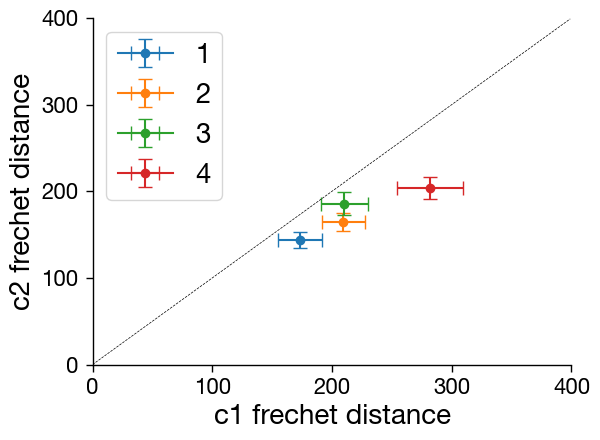

In [116]:
for i in range(1,5):
    uz1 = np.asarray(list(zip(*pdata_stats_c1[i]))).flatten()
    uz2 = np.asarray(list(zip(*pdata_stats_c2[i]))).flatten()
    uz1_mean = np.mean(uz1)
    uz2_mean = np.mean(uz2)
    uz1_ints = st.norm.interval(confidence=0.90,
                 loc=np.mean(uz1),
                 scale=st.sem(uz1))
    uz2_ints = st.norm.interval(confidence=0.90,
                 loc=np.mean(uz2),
                 scale=st.sem(uz2))
    plt.errorbar(uz1_mean, uz2_mean,
                 xerr=np.asarray([uz1_mean - uz1_ints[0], uz1_ints[1] - uz1_mean]).reshape(2,1),
                 yerr=np.asarray([uz2_mean - uz2_ints[0], uz2_ints[1] - uz2_mean]).reshape(2,1),
                 capsize=5, marker='o', label=i)

plt.xlim([0,400])
plt.ylim([0,400])
plt.xlabel('c1 frechet distance')
plt.ylabel('c2 frechet distance')
plt.legend()
plt.plot(np.arange(400), np.arange(400), lw=.5, ls='--', c='black')
fig_format.hide_frame(plt.gca())
plt.show()

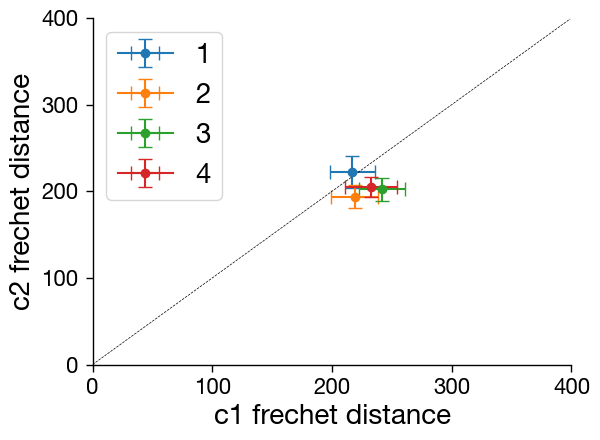

In [119]:
for i in range(1,5):
    uz1 = np.asarray(list(zip(*pdata_stats_c1_p3[i]))).flatten()
    uz2 = np.asarray(list(zip(*pdata_stats_c2_p3[i]))).flatten()
    uz1_mean = np.mean(uz1)
    uz2_mean = np.mean(uz2)
    uz1_ints = st.norm.interval(confidence=0.90,
                 loc=np.mean(uz1),
                 scale=st.sem(uz1))
    uz2_ints = st.norm.interval(confidence=0.90,
                 loc=np.mean(uz2),
                 scale=st.sem(uz2))
    plt.errorbar(uz1_mean, uz2_mean,
                 xerr=np.asarray([uz1_mean - uz1_ints[0], uz1_ints[1] - uz1_mean]).reshape(2,1),
                 yerr=np.asarray([uz2_mean - uz2_ints[0], uz2_ints[1] - uz2_mean]).reshape(2,1),
                 capsize=5, marker='o', label=i)

plt.xlim([0,400])
plt.ylim([0,400])
plt.xlabel('c1 frechet distance')
plt.ylabel('c2 frechet distance')
plt.legend()
plt.plot(np.arange(400), np.arange(400), lw=.5, ls='--', c='black')
fig_format.hide_frame(plt.gca())
plt.show()

In [64]:
scores_c1 = {1:{1:[],2:[],3:[],4:[]}, 2:{1:[],2:[],3:[],4:[]}, 3:{1:[],2:[],3:[],4:[]}, 4:{1:[],2:[],3:[],4:[]}}
for participant in data_c1:
    td = pd.DataFrame(participant['data'])
    td = td.query('set == "main"')

    for i in range(1,5):
        tdi = td.query('step == @i & score > 0')
        pattern = tdi.pattern.iloc[0]
        
        # pdb.set_trace()
        p1_score = tdi[tdi['phase'] == 1]['score']
        p2_score = tdi[tdi['phase'] == 2]['score']
        p3_score = tdi[tdi['phase'] == 3]['score']
        
        pb_score = td.query('phase == 3 & step == 5 & pattern == @pattern').score
#         print(td.query('phase == 3 & step == 5 & pattern == @pattern'))

        # p1_scores.append(np.mean(p1_score))
        # p3_scores.append(np.mean(p3_score))
        
        scores_c1[i][1] += list(p1_score)
        scores_c1[i][2] += list(p2_score)
        scores_c1[i][3] += list(p3_score)
        scores_c1[i][4] += list(pb_score)

#         difs_c1[i].append((np.mean(p1_score), np.mean(p2_score), np.mean(p3_score), np.mean(pb_score)))

In [65]:
scores_c2 = {1:{1:[],2:[],3:[],4:[]}, 2:{1:[],2:[],3:[],4:[]}, 3:{1:[],2:[],3:[],4:[]}, 4:{1:[],2:[],3:[],4:[]}}
for participant in data_c2:
    td = pd.DataFrame(participant['data'])
    td = td.query('set == "main"')

    for i in range(1,5):
        tdi = td.query('step == @i & score > 0')
        pattern = tdi.pattern.iloc[0]
        
        # pdb.set_trace()
        p1_score = tdi[tdi['phase'] == 1]['score']
        p2_score = tdi[tdi['phase'] == 2]['score']
        p3_score = tdi[tdi['phase'] == 3]['score']
        
        pb_score = td.query('phase == 3 & step == 5 & pattern == @pattern').score
#         print(td.query('phase == 3 & step == 5 & pattern == @pattern'))

        # p1_scores.append(np.mean(p1_score))
        # p3_scores.append(np.mean(p3_score))
        
        scores_c2[i][1] += list(p1_score)
        scores_c2[i][2] += list(p2_score)
        scores_c2[i][3] += list(p3_score)
        scores_c2[i][4] += list(pb_score)

#         difs_c1[i].append((np.mean(p1_score), np.mean(p2_score), np.mean(p3_score), np.mean(pb_score)))

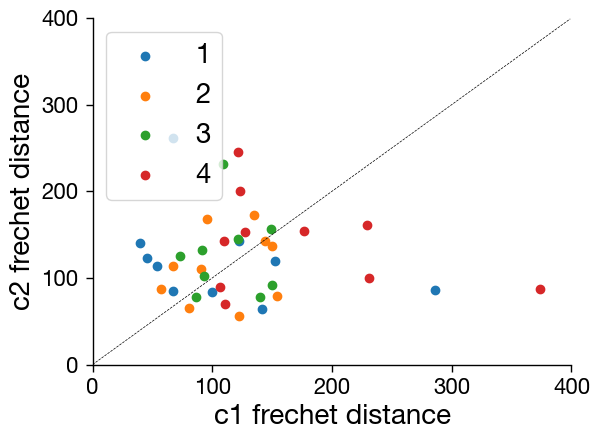

In [41]:
for i in range(1,5):
  uz1 = list(zip(*pdata_stats_c1[i]))
  uz2 = list(zip(*pdata_stats_c2[i]))  
  plt.scatter(uz1[0], uz2[0], label=i)

plt.xlim([0,400])
plt.ylim([0,400])
plt.xlabel('c1 frechet distance')
plt.ylabel('c2 frechet distance')
plt.plot(np.arange(400), np.arange(400), lw=.5, ls='--', c='black')
plt.legend()
fig_format.hide_frame(plt.gca())
plt.show()

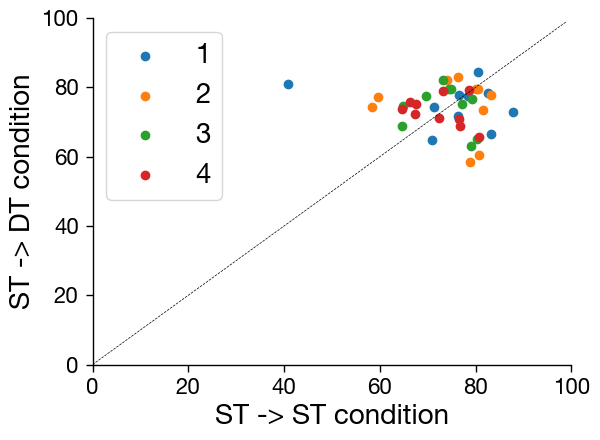

In [45]:
# 0 is learn
# 1 is st/dt
# 2 is test
# 3 is bonus

for i in range(1,5):
    uz1 = list(zip(*difs_c1[i]))
    uz2 = list(zip(*difs_c2[i]))
    plt.scatter(uz1[1], uz2[1], label=i)

plt.xlim([0,100])
plt.ylim([0,100])
plt.xlabel('ST -> ST condition')
plt.ylabel('ST -> DT condition')
plt.plot(np.arange(100), np.arange(100), lw=.5, ls='--', c='black')
plt.legend()
fig_format.hide_frame(plt.gca())
plt.show()

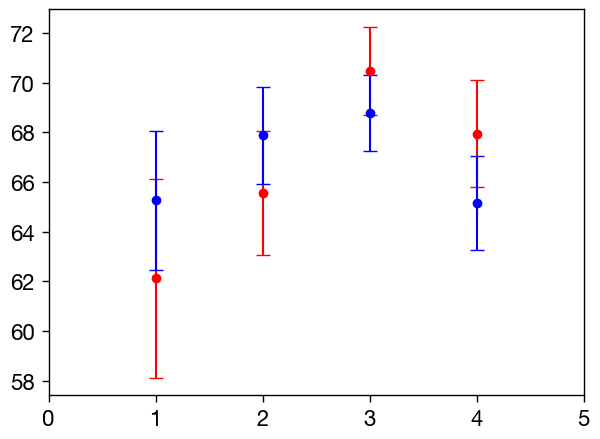

In [122]:
for i in range(1, 5):
#     print(i)
    a = np.array(scores_c1[i][3])
#     print(np.mean(a), np.std(a))
    a_ints = st.norm.interval(confidence=0.90,
                 loc=np.mean(a),
                 scale=st.sem(a))
    a_mean = np.mean(a)
#     print(p1_ints)
    b = np.array(scores_c2[i][3])
    b_ints = st.norm.interval(confidence=0.90,
                 loc=np.mean(b),
                 scale=st.sem(b))
    b_mean = np.mean(b)
#     print(np.mean(b), np.std(b))
#     print([a_mean - a_ints[0], a_ints[1] - a_mean])
    plt.errorbar(i, a_mean, yerr=np.asarray([a_mean - a_ints[0], a_ints[1] - a_mean]).reshape(2,1), color='red', label='c1', capsize=5, marker='o')
    plt.errorbar(i, b_mean, yerr=np.asarray([b_mean - b_ints[0], b_ints[1] - b_mean]).reshape(2,1), color='blue', label='c2', capsize=5, marker='o')
    
plt.xlim([0,5])

plt.show()

In [59]:
np.array(difs_c1[1])[:,2]

array([62.21      , 64.36      , 64.29      , 48.37      , 67.09      ,
       82.31      , 78.4       , 60.57      , 52.92      , 31.65714286])

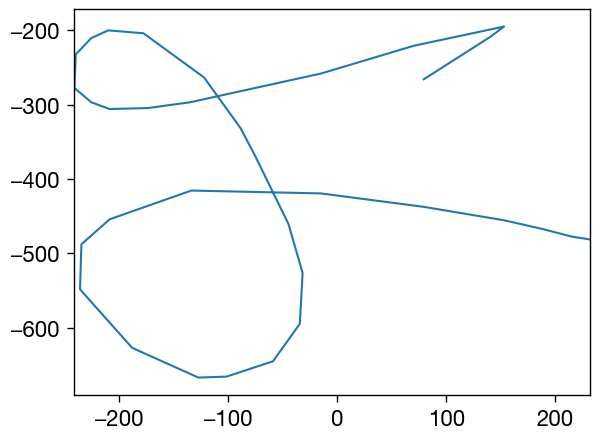

In [63]:
participant = data[2]
td = pd.DataFrame(participant['data'])
td = td[td['set'] == 'main']

tdi = td[td['step'] == 4]
pointer_data = tdi.iloc[11].pointer_data
x, y = pointer_data['x'], pointer_data['y']
plt.plot(x, y)
plt.show()

In [132]:
pd.set_option('display.max_rows', None)  # or 1000

In [40]:
pd.DataFrame(data_c1[5]['data']).query('phase == 2').shape_correct.sum()

80.0

In [48]:
data_c1[3]['config']

{'id': '5f512f61',
 'is_prolific': True,
 'is_sona': False,
 'institution': 'yale',
 'description': 'intentional-patterns v2_bonus',
 'datetime': '2022-10-19T18:29:04.503Z',
 'already_visited': False,
 'width': 1800,
 'height': 1200,
 'renderer': 'webgl',
 'user_agent': {'browser': {'name': 'Chrome',
   'version': '106.0.0.0',
   'major': '106'},
  'os': {'name': 'Mac OS', 'version': '10.15.7'}},
 'fullscreen_supported': True,
 'is_debug': False,
 'version': 1,
 'condition': '2'}